<a class="anchor" id="0.1"></a>
# **Table of Contents** 

1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Exogenous variables](#7)
8. [Splitting training and test data with exogenous variables](#8)
9. [Implementation of StatsForecast with exogenous variables](#9)
10. [Evaluate the model for exogenous variables](10)
11. [Conclusion](#11)
12. [References](12)

# **Introduction** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

Time series modeling is a statistical technique widely used in various fields, including agricultural production. In this context, time series modeling can be applied to the study and analysis of asparagus production, a highly demanded crop in the food industry.

Asparagus production is a complex process that is influenced by a variety of factors, such as climatic conditions, growing methods, resource availability and market demand. Understanding and predicting patterns and trends in asparagus production is essential to optimize planting, harvesting and marketing processes, as well as to make informed decisions in crop management.

Time series modeling provides a powerful tool for analyzing historical asparagus production data over time. By using techniques such as trend analysis, seasonal decomposition and autocorrelation, it is possible to identify seasonal patterns, detect long-term changes and evaluate the influence of external factors on production.

Additionally, time series models enable accurate forecasting and estimates of future production, which is invaluable for planning and strategic decision-making in the agricultural sector. These models can integrate climate variables, such as temperature and precipitation, as well as other relevant indicators, such as market demand and sales prices, to improve the accuracy of predictions.

In summary, time series modeling applied to asparagus production offers an effective methodology to understand, analyze and forecast patterns and trends in the production of this crop. By using this technique, farmers and industry players can make informed decisions and improve efficiency in managing asparagus crops, thereby maximizing their production and profitability.

# **Case study** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

In this case study, we will focus on forecasting asparagus production in the next 12 months using time series models. The main objective is to predict the amount of asparagus expected to be produced each month, which will allow farmers to make informed decisions about planting planning, resource management and marketing.

Historical data on asparagus production was collected during the periods from 2001 to December 2020. Monthly production quantities were recorded, considering factors such as temperature, precipitation, humidity and other aspects relevant to the production of this crop.

We will use different techniques for analysis and forecasting:

1. Data collection.
2. Exploratory data analysis.
3. Data preparation.
4. Model selection.
5. Model adjustment and evaluation.
6. Asparagus Production Forecast.

With the forecast of asparagus production in the next 12 months, farmers will be able to make informed decisions about planting planning, resource management and marketing. Furthermore, the use of time series models will allow a better understanding of patterns and trends in asparagus production, which will contribute to more efficient and profitable management of this crop.

## **Load Library**

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose 
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5

## **Load data**

Information about our data:

	- date : date monthly frequency
    - esparrago: 
    - temperatura: 
    - precipitacion:
    - humeda:
    -is_esparrago:

More information about the data [here](http://www.agrolalibertad.gob.pe/index.php?q=node/24)


In [61]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/Produccion_de_Esparrago.csv",parse_dates=["date"]).loc[:, ['date', 'esparrago']]
df

,date,esparrago
0,2001-01-01,8674.0
1,2001-02-01,7448.4
2,2001-03-01,7564.5
3,2001-04-01,7023.0
4,2001-05-01,5683.0
...,...,...
235,2020-08-01,10295.9
236,2020-09-01,9432.1
237,2020-10-01,9913.0
238,2020-11-01,13612.3


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [4]:
df["unique_id"]="1"
df=df.rename(columns={"date": "ds", "esparrago": "y"})
df.head()

,ds,y,unique_id
0,2001-01-01,8674.0,1
1,2001-02-01,7448.4,1
2,2001-03-01,7564.5,1
3,2001-04-01,7023.0,1
4,2001-05-01,5683.0,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ds             240 non-null    datetime64[ns]
 1   y              240 non-null    float64       
 2   temperatura    240 non-null    float64       
 3   precipitacion  240 non-null    float64       
 4   humeda         240 non-null    float64       
 5   is_esparrago   240 non-null    float64       
 6   unique_id      240 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 13.2+ KB


# **Explore Data with the plot method** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

Graphical visualization of time series can be an effective strategy for detecting trends, patterns, and seasonality. This approach, in turn, makes it easier to identify potential lags that could be used as predictors in the model.

We will use the `plot` method of `Statsforecast` to visualize our data. This method prints 8 random series from the dataset and is useful for basic EDA.

This is what our data looks like, after having performed a couple of maneuvers on our data.

In [6]:
df1=df.copy()

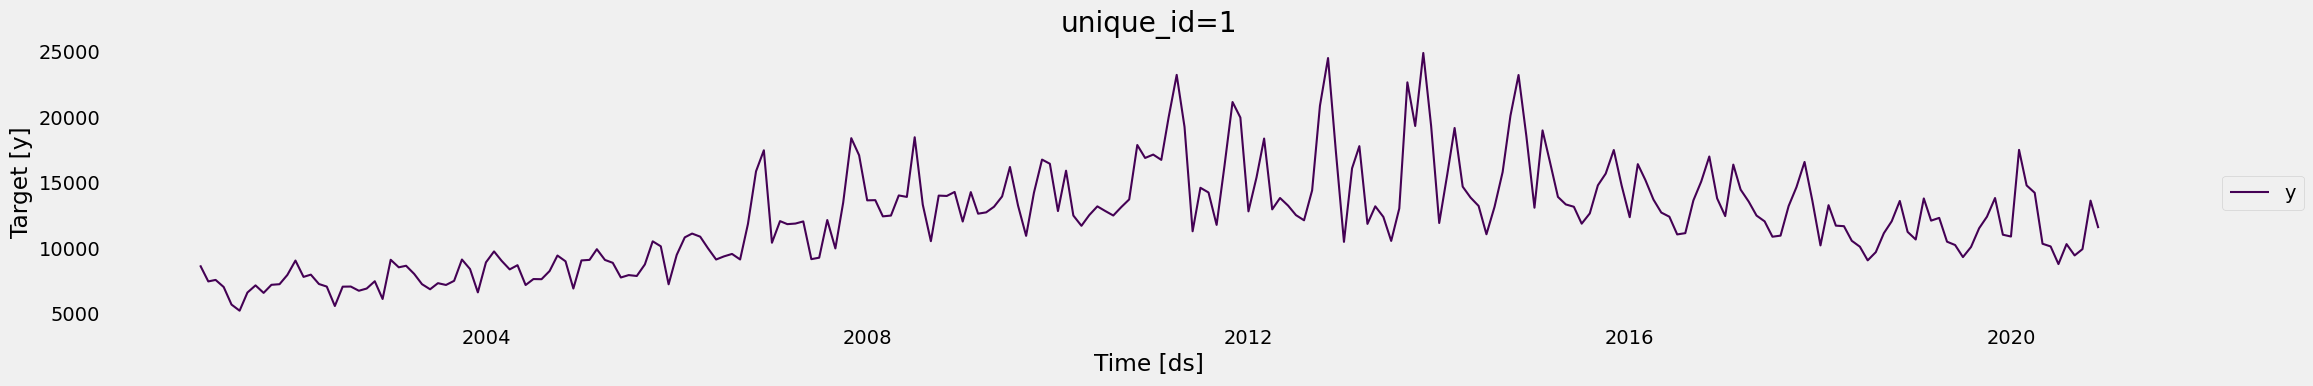

In [7]:
plot_series(df)

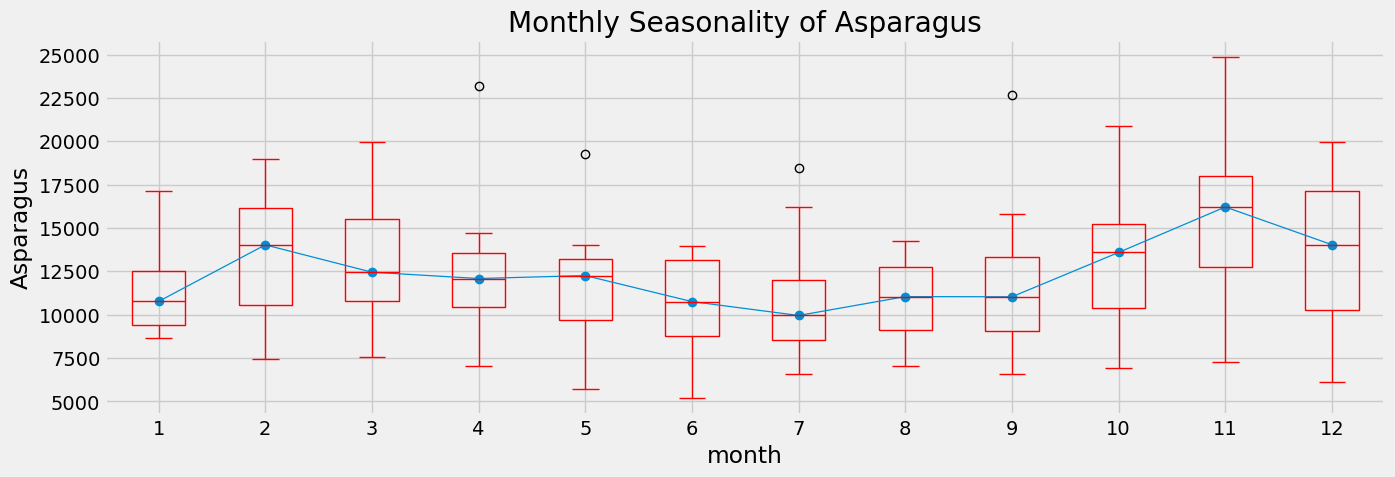

In [8]:
# Boxplot graph for monthly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(16, 5))
df1['month'] = df1['ds'].apply(lambda x: x.month)
df1.boxplot(column="y", by='month', ax=ax, color="red")
df1.groupby('month')["y"].median().plot(style='o-', linewidth=0.9, ax=ax)
ax.set_ylabel('Asparagus')
ax.set_title('Monthly Seasonality of Asparagus')
fig.suptitle('');
#plt.savefig("Gráfico de Barra-mes")

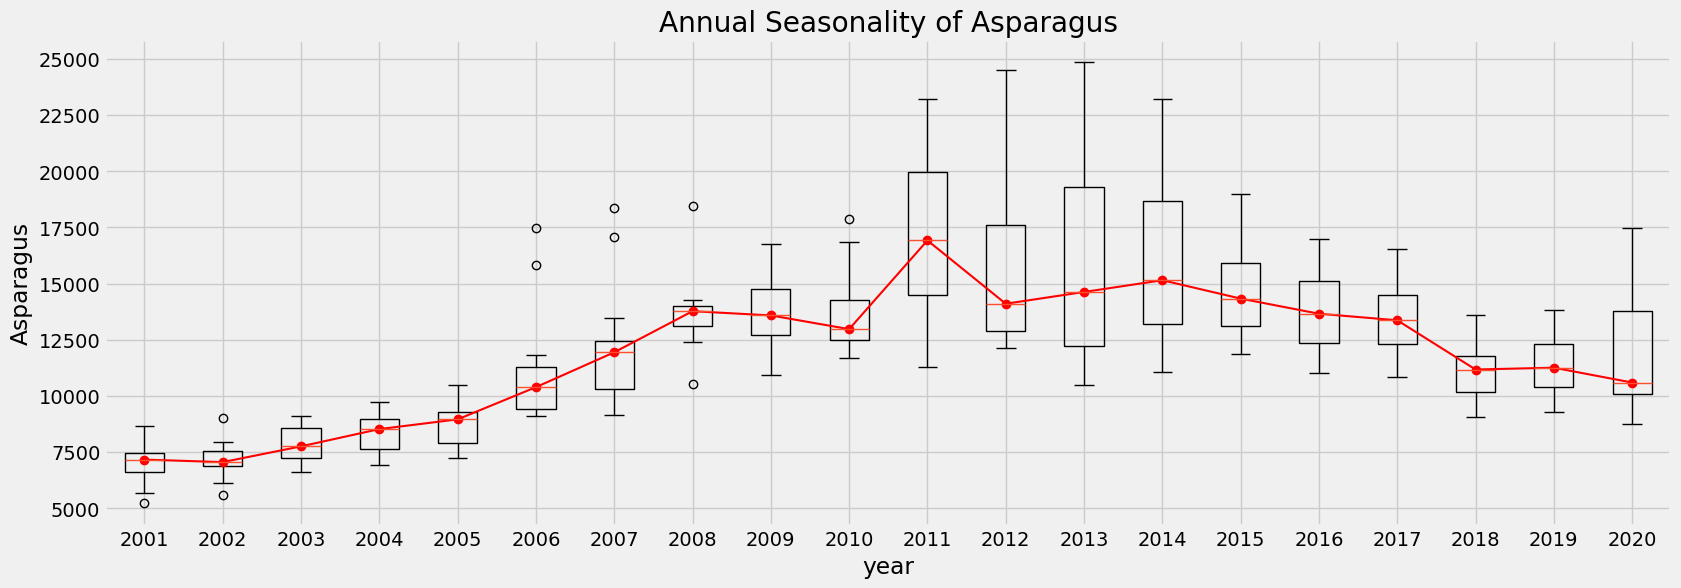

In [9]:
# Boxplot graph for annual seasonality
# ==============================================================================
# Extract year component from date
df1['year'] = df['ds'].dt.year

# Create a dictionary to store the data for each year
data_anual = {}
for year in df1['year'].unique():
    data_anual[year] = df1.loc[df1['year'] == year, 'y'].values

# Create a data list for the Boxplot chart
boxplot_data = [data_anual[year] for year in sorted(data_anual.keys())]

# Create the Boxplot chart
plt.figure(figsize=(18, 6))
plt.boxplot(boxplot_data, labels=sorted(data_anual.keys()))
plt.xlabel('year')
plt.ylabel('Asparagus')
plt.title('Annual Seasonality of Asparagus')

# Add the median line graph
medians = [np.median(data_anual[year]) for year in sorted(data_anual.keys())]
plt.plot(range(1, len(medians) + 1), medians, marker='o', color='red', linestyle='-')

plt.show()

We can see in the graphs that seasonality patterns are presented by sections over the months as well as over the years. The months in which the highest asparagus production occurs are in the months of October, November and December, followed by the months of February and March, this is due to many other climatic factors in the region.

## **Autocorrelation Plot**

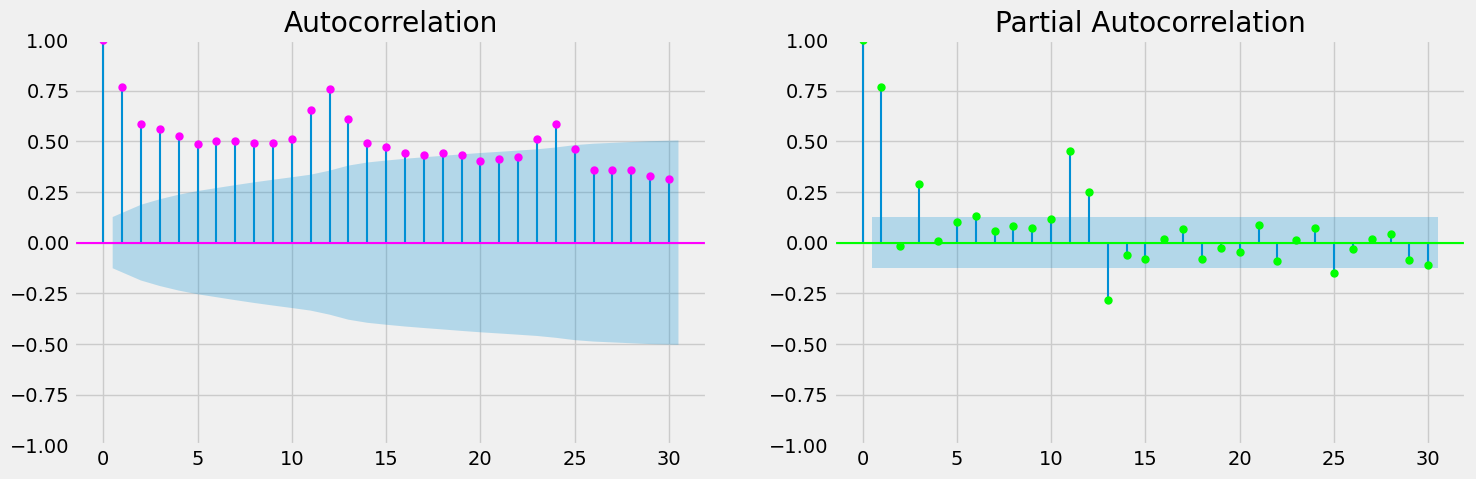

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

plot_acf(df["y"],  lags=30, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["y"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')
plt.show()

The results of the autocorrelation analysis reveal a significant relationship between the number of production in the previous months and the number of asparagus production in the future. This suggests that having information about the demand for asparagus production in specific periods in the past can be useful in predicting the demand for asparagus in the future.

# **Split the data into training and testing** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 12 months.

In [11]:
train = df[df.ds<='2019-12-01'] 
test=df[(df['ds'] > '2019-12-01')]

train.shape, test.shape

((228, 3), (12, 3))

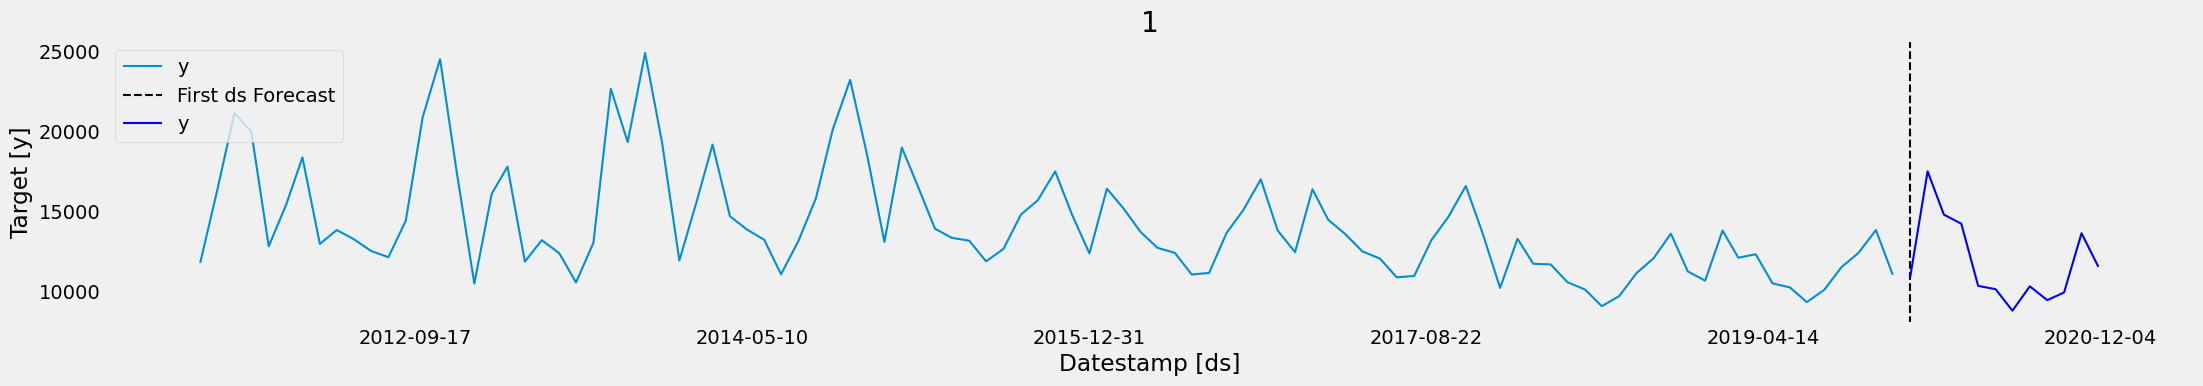

In [13]:
StatsForecast.plot(train, test, max_insample_length=100)

# **Implementation with StatsForecast** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

We are going to train the `Seasonal Exponential Smoothing Optimized` model, using the `SeasonalExponentialSmoothingOptimized` function. This model will help us forecast user demand in the next 12 month.

In [14]:
from statsforecast import StatsForecast
from statsforecast.models import SeasonalExponentialSmoothingOptimized

In [15]:
season_length = 12 # month data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [SeasonalExponentialSmoothingOptimized(season_length=season_length)]

In [16]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    df=train,
    models=models,
    freq='MS', 
    n_jobs=-1)

## **Fit the Model**

In [17]:
sf.fit()

StatsForecast(models=[SeasESOpt])

## **Predict Method**
We will use the predict method to forecast the last 12 months of asparagus production. This method only has one parameter, the forecast horizon. 

In [18]:
Y_hat = sf.predict(horizon)
Y_hat

,ds,SeasESOpt
unique_id,,
1,2020-01-01,10832.371094
1,2020-02-01,13758.225586
1,2020-03-01,12075.020508
1,2020-04-01,12625.572266
1,2020-05-01,10701.257812
1,2020-06-01,10223.813477
1,2020-07-01,9343.943359
1,2020-08-01,10074.164062
1,2020-09-01,11571.779297


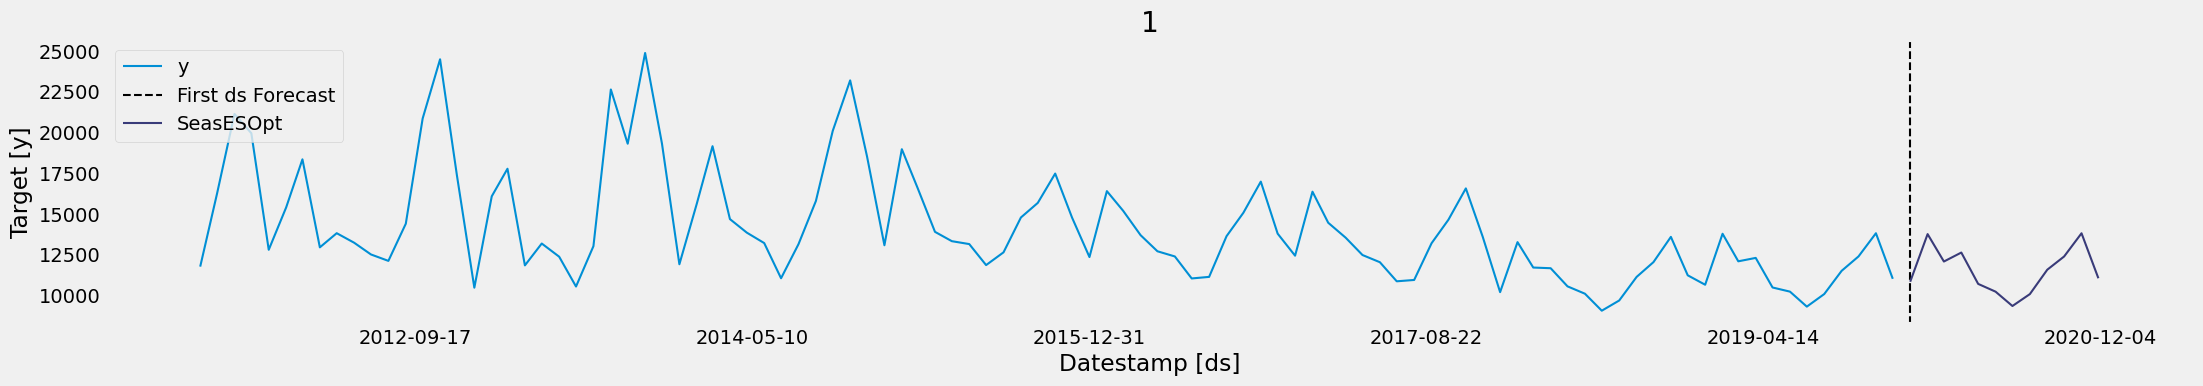

In [20]:
sf.plot(train, Y_hat, max_insample_length=100)

# **Evaluate the model** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

We are going to evaluate the performance of our asparagus production model, for this we are going to build a function where we can have different types of metrics.

In [21]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [22]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [23]:
print("Model without exogenous variable")
evaluate_performace(train, test,Y_hat.reset_index() , models=["SeasESOpt"])

Model without exogenous variable


,mae,mape,mase,rmse,smape
SeasESOpt,1216.913688,9.800614,0.531193,1711.422183,9.782567


# **Exogenous variables**<a class="anchor" id="7"></a>

[Table of Contents](#0.1)

We are going to select the exogenous variables that will enter our model, for this it is necessary to have two sets of data:

1. The training data: this data will contain all the exogenous variables that we are going to add to our model plus the target variables.
2. Data with exogenous variables: we select the variables that we want to add to our model, but this data set does not contain the target variable.

Let's load the data... and see!!!

In [24]:
df=pd.read_excel("../tutorial/esparrago.xlsx",sheet_name="Hoja1", parse_dates=["date"])

In [25]:
df["unique_id"]="1"
df=df.rename(columns={"date": "ds", "esparrago": "y"})
df.head()

,ds,y,temperatura,precipitacion,humeda,is_esparrago,unique_id
0,2001-01-01,8674.0,21.5,0.40,75.4,8529.0,1
1,2001-02-01,7448.4,23.8,1.30,76.1,8319.0,1
2,2001-03-01,7564.5,23.5,1.30,76.0,7889.0,1
3,2001-04-01,7023.0,21.4,0.87,74.3,7727.0,1
4,2001-05-01,5683.0,18.1,0.20,73.7,7462.0,1


We can see that now our data set contains more variables, such as temperature, precipitation, humidity, and is.

We create a new data set with the exogenous variables to train our model.

In [40]:
df2=df[["ds","y","temperatura","precipitacion","unique_id","humeda"]]

We created the other data set with only the exogenous variables, here this data set does not have the target variable.

In [41]:
exogen=df[["ds","temperatura","precipitacion","unique_id","humeda"]]

# **Splitting training and test data with exogenous variables** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

Let's divide our data into sets
1. Data to train our model
2. Data to test our model

For the test data we will use the last 12 month to test and evaluate the performance of our model.

In [42]:
train_exo = df2[df2.ds<='2019-12-01'] 
test_exo=exogen[(exogen['ds'] > '2019-12-01') ]

train_exo.shape, test_exo.shape

((228, 6), (12, 5))

# **Implementation of StatsForecast with exogenous variables** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

In [43]:
season_length = 12 # month data 
horizon = len(test_exo) # number of predictions

# We call the model that we are going to use
models_exo = [SeasonalExponentialSmoothingOptimized(season_length=season_length)]

In [44]:
# Instantiate StatsForecast class as sf
sf_exo = StatsForecast(
    models=models_exo,
    freq='MS', 
    n_jobs=-1)
sf_exo

StatsForecast(models=[SeasESOpt])

## **Fit model with exogenous variables**

The fit method has two parameters:

* Training data with exogenous variables.
* Data with only exogenous variables.

In [45]:
%%time
sf_exo.fit(train_exo,test_exo)

CPU times: user 11.6 ms, sys: 2.82 ms, total: 14.4 ms
Wall time: 12.4 ms


StatsForecast(models=[SeasESOpt])

## **Predict Method**

The predict method takes only 2 parameters

* The Horizon: amount of data you want to predict.
* Exogenous variables without the target variable.

In [46]:
Y_hat_exo=sf_exo.predict(h=horizon,  X_df=test_exo) 
Y_hat_exo

,ds,SeasESOpt
unique_id,,
1,2020-01-01,10832.371094
1,2020-02-01,13758.225586
1,2020-03-01,12075.020508
1,2020-04-01,12625.572266
1,2020-05-01,10701.257812
1,2020-06-01,10223.813477
1,2020-07-01,9343.943359
1,2020-08-01,10074.164062
1,2020-09-01,11571.779297


In [47]:
actual_exo=df2[df2.ds>'2019-12-01'] 

## **Plot forecasting**

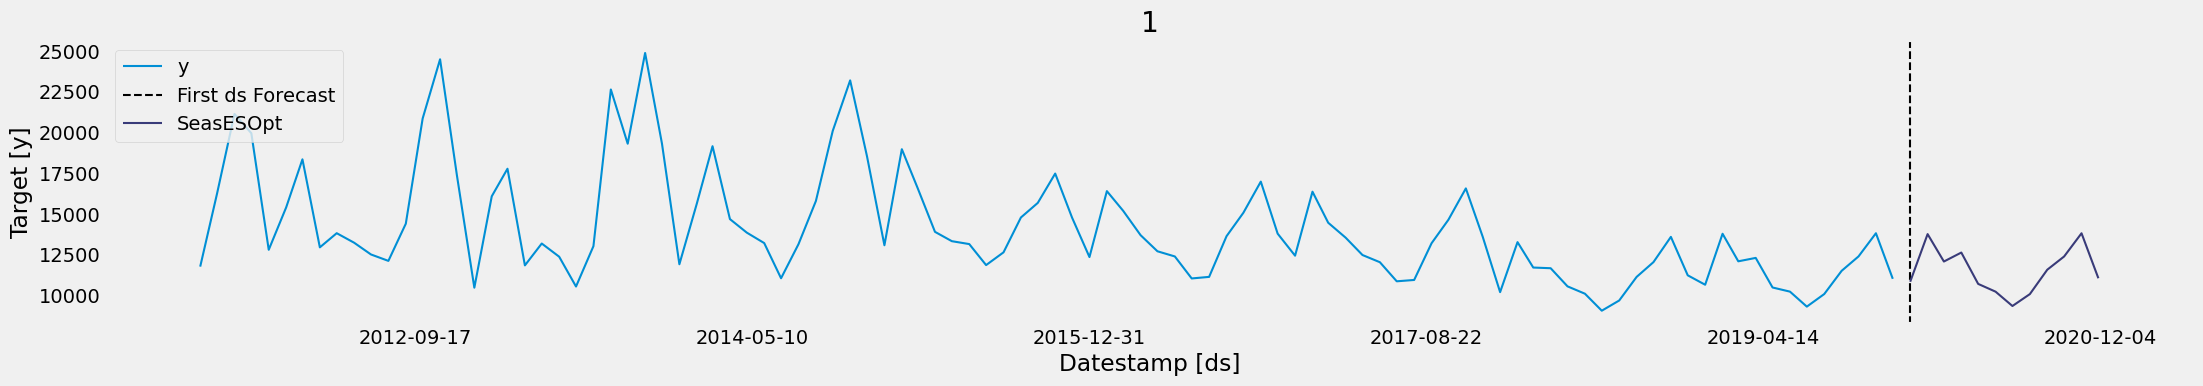

In [48]:
sf.plot(train_exo, Y_hat_exo, max_insample_length=100)

# **Evaluate the model for exogenous variables** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

In [49]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [53]:
print("Model with exogenous variable")
evaluate_performace(train_exo, actual_exo,Y_hat_exo.reset_index() , models=["SeasESOpt"])

Model with exogenous variable


,mae,mape,mase,rmse,smape
SeasESOpt,1216.913688,9.800614,0.531193,1711.422183,9.782567


# **Conclusion** <a class="anchor" id="11"></a>


[Table of Contents](#0.1)

According to the results, two models were made to predict asparagus production: one with an exogenous variable and another without it. Both models were based on the `Seasonal Exponential Smoothing Optimized (SeasESOpt) method`. 

In [52]:
print("Model without exogenous variable")
evaluate_performace(train, test,Y_hat.reset_index() , models=["SeasESOpt"])

Model without exogenous variable


,mae,mape,mase,rmse,smape
SeasESOpt,1216.913688,9.800614,0.531193,1711.422183,9.782567


At first glance, it can be seen that both models have identical results for all the evaluated metrics. This indicates that the inclusion of the exogenous variable did not have a significant impact on the accuracy of the predictions compared to the model without the exogenous variable.

Overall, the sSeasonal Exponential Smoothing Optimized model used in this analysis appears to provide predictions with a similar level of accuracy, regardless of the inclusion of an exogenous variable. However, to obtain a more complete and reliable assessment of the quality of the models, it is advisable to perform additional analysis, such as comparison with other forecasting methods or cross-validation.

**We can consider other aspects to improve the model:**

     - Train different models that can improve the performance of Asparagus production.
     - Develop a Cross Validations.
     - Train Machine Learning and Deep Learning Models.

# **References** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)

1. Changquan Huang • Alla Petukhina. Springer series (2022). Applied Time Series Analysis and Forecasting with Python. 
2. Ivan Svetunkov. [Forecasting and Analytics with the Augmented Dynamic Adaptive Model (ADAM)](https://openforecast.org/adam/)
3. [James D. Hamilton. Time Series Analysis Princeton University Press, Princeton, New Jersey, 1st Edition, 1994.](https://press.princeton.edu/books/hardcover/9780691042893/time-series-analysis)
4. [Nixtla Parameters](https://nixtla.github.io/statsforecast/src/core/models.html#seasonalsmoothoptimized).
5. [Pandas available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
6. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”.](https://otexts.com/fpp3/tscv.html).
7. [Seasonal periods- Rob J Hyndman](https://robjhyndman.com/hyndsight/seasonal-periods/).
8. [Seasonal Exponential Smoothing Optimized Model](https://nixtla.github.io/statsforecast/docs/models/seasonalexponentialsmoothingoptimized.html#seasonal-exponential-smoothing-model)